##**Import Libraries** 

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

##**Load Data**

**Data Sources**
- I will be using the sklearn.datasets package to fetch data directly 
- However, it's possible to get the dataset and download it from UCI ML via this link: [https://goo.gl/U2Uwz2](https://goo.gl/U2Uwz2)
- And, the data exists as well on Kaggle: [https://www.kaggle.com/BCWD](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)

**About Dataset**
- Breast cancer Wisconsin dataset: This dataset contains the measurements of several features of cell nuclei in biopsy images of breast mass. It has 30 features and 569 samples, and is commonly used for binary classification tasks.
- Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

    ![breast-mass.jpg](https://www.rxdatascience.com/hubfs/Raj%20Files/es1.jpg) 
- The breast cancer dataset is a classic and very easy binary classification dataset.

description | Preview
--- | ---
Classes | 2
Samples per class | 212(M),357(B)
Samples total | 569
Dimensionality | 30
Features | real, positive

**Some Attributes Information**

- Diagnosis (M = malignant, B = benign)
- Radius (mean of distances from center to points on the perimeter)
- Texture (standard deviation of gray-scale values)
- Perimeter
- Area
- Smoothness (local variation in radius lengths)
- Compactness (perimeter^2 / area - 1.0)

In [ ]:
# Loading data
bcwd = load_breast_cancer()

In [ ]:
# Transforming the dataset into dataframe to have more flexibility and to ease the data manipulation
data = pd.DataFrame(bcwd.data, columns = bcwd.feature_names)
# Returning the first 5 samples of the dataset
data.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


##**Explore Data**

In [ ]:
# Discovering the number of samples and features (dimensions)
data.shape

(569, 30)

According to the description from the previous section, it's confirmed that the dataset has **569** observations and **30** features

In [ ]:
# Getting more statistical details about the data 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


As the purpose is to predict if it's a Malignant (1) or not (0), I noticed that the numbers have been inverted. So, I am going to replace 0s by 1s and vice versa, in order to have the suitable targets

In [ ]:
bcwd_target = [1 if i == 0 else 0 for i in bcwd.target]

In [ ]:
# Creating a dataframe that contains only the labels, for further exploration and checking
diagnosis = {
    'Target Names': ['Benign' if x == 0 else 'Malignant' for x in bcwd_target],
    'Target': bcwd_target
}
diagnosis = pd.DataFrame(diagnosis)
diagnosis.head()

,Target Names,Target
0,Malignant,1
1,Malignant,1
2,Malignant,1
3,Malignant,1
4,Malignant,1


In [ ]:
diagnosis['Target'].unique()

array([1, 0])

In [ ]:
diagnosis['Target Names'].unique()

array(['Malignant', 'Benign'], dtype=object)

In [ ]:
counts = diagnosis['Target Names'].value_counts()
counts

Benign       357
Malignant    212
Name: Target Names, dtype: int64

For the prediction step, **1** refers to Malignant means **negative case** and **0** refers to Benign that tends to be our **positive case**. As a result, we end up with **357** positive cases (Benign), alongside **212** negative observations (Malignant).

The chart below speaks all:

<Axes: ylabel='Target Names'>

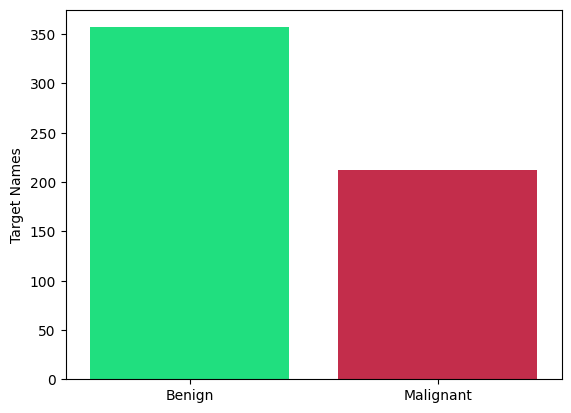

In [ ]:
# Plot the counts
clrs = ['springgreen' if (x >= max(counts)) else 'crimson' for x in counts ]
sns.barplot(x=counts.index, y=counts, palette=clrs, )

As we have imported the dataset from sklearn directly, no preparation required.

Some if not most of the datasets are already preprocessed, so no need to any cleaning phase (not the case for Kaggle that requires to step in to this phase).

However, we notice here that our data have so many features so that we may not need all of them for our purpose (classification)

**To fix this**, we need to study and examine the correlation between variables.

###**Study Correlation**

A correlation coefficient is used in statistics to describe a pattern or relationship between two variables:

$$ r = (n * Σ(xy) - Σx * Σy) / sqrt((n * Σx^2 - (Σx)^2) * (n * Σy^2 - (Σy)^2)) $$

Where:

- r is the sample correlation coefficient
- n is the sample size
- Σ is the sum of the values
- xy is the product of x and y values
- x and y are the variables of interest

**Negative Versus Positive Correlation**

A negative correlation demonstrates a connection between two variables in the same way as a positive correlation coefficient, and the relative strengths are the same. In other words, a correlation coefficient of 0.85 shows the same strength as a correlation coefficient of -0.85.

Correlation coefficients are always values between -1 and 1, where -1 shows a perfect, linear negative correlation, and 1 shows a perfect, linear positive correlation.

In [ ]:
# Fetching only the mean features
def get_mean_features(cols):
  l = [f for f in cols if f.startswith('mean') ]
  df = data[l]
  df['Target'] = diagnosis['Target']
  return df
mf= get_mean_features(data.columns)
mf.head()

<ipython-input-12-a02e226cbee7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target'] = diagnosis['Target']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,1


In [ ]:
# Fetching only the error features
def get_error_features(cols):
  l = [f for f in cols if f.endswith('error') ]
  df = data[l]
  df['Target'] = diagnosis['Target']
  return df
ef = get_error_features(data.columns)
ef.head()

<ipython-input-13-af95f04a615e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target'] = diagnosis['Target']


,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,Target
0,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,1
1,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,1
2,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,1
3,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,1
4,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,1


In [ ]:
# Fetching only the worst features
def get_worst_features(cols):
  l = [f for f in cols if f.startswith('worst') ]
  df = data[l]
  df['Target'] = diagnosis['Target']
  return df
wf = get_worst_features(data.columns)
wf.head()

<ipython-input-14-705c70161dad>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target'] = diagnosis['Target']


,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


After consulting the 3 tables above, we may sum up with a decision to drop all the features that are not correlated with the **Target**, means the ones that have a correlation **lesser than the threshold** (I'm going to choose **0.65** as a threshold).

This step will be projected to all the tables.

In [ ]:
mf.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,Target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,-0.012838


In [ ]:
features_to_be_dropped = []

In [ ]:
# Function to return all of the undesired features
def get_undesired_features(df, threshold):
  tr = df.loc['Target']
  features = []
  for ind in tr.index:
    if abs(tr[ind]) < threshold:
      features.append(ind)
  return features

In [ ]:
# get all of the unwanted mean features
umf = get_undesired_features(mf.corr(), 0.65)
features_to_be_dropped.extend(umf)
umf

['mean texture',
 'mean smoothness',
 'mean compactness',
 'mean symmetry',
 'mean fractal dimension']

'**mean texture**', '**mean smoothness**', '**mean compactness**', '**mean symmetry**', '**mean fractal dimension**' are the features that will be dropped off

In [ ]:
ef.corr()

,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,Target
radius error,1.000000,0.213247,0.972794,0.951830,0.164514,0.356065,0.332358,0.513346,0.240567,0.227754,0.567134
texture error,0.213247,1.000000,0.223171,0.111567,0.397243,0.231700,0.194998,0.230283,0.411621,0.279723,-0.008303
perimeter error,0.972794,0.223171,1.000000,0.937655,0.151075,0.416322,0.362482,0.556264,0.266487,0.244143,0.556141
area error,0.951830,0.111567,0.937655,1.000000,0.075150,0.284840,0.270895,0.415730,0.134109,0.127071,0.548236
smoothness error,0.164514,0.397243,0.151075,0.075150,1.000000,0.336696,0.268685,0.328429,0.413506,0.427374,-0.067016
compactness error,0.356065,0.231700,0.416322,0.284840,0.336696,1.000000,0.801268,0.744083,0.394713,0.803269,0.292999
concavity error,0.332358,0.194998,0.362482,0.270895,0.268685,0.801268,1.000000,0.771804,0.309429,0.727372,0.253730
concave points error,0.513346,0.230283,0.556264,0.415730,0.328429,0.744083,0.771804,1.000000,0.312780,0.611044,0.408042
symmetry error,0.240567,0.411621,0.266487,0.134109,0.413506,0.394713,0.309429,0.312780,1.000000,0.369078,-0.006522
fractal dimension error,0.227754,0.279723,0.244143,0.127071,0.427374,0.803269,0.727372,0.611044,0.369078,1.000000,0.077972


In [ ]:
# get all of the unwanted error features
uef = get_undesired_features(ef.corr(), 0.5)
features_to_be_dropped.extend(uef)
uef

['texture error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error']

'**texture error**', '**smoothness error**', '**compactness error**', '**concavity error**', '**concave points error**', '**symmetry error**', '**fractal dimension error**' are the features that will be dropped off. I changed the threshold to 0.5 as the correlation values are weaker.

In [ ]:
wf.corr()

,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
worst radius,1.000000,0.359921,0.993708,0.984015,0.216574,0.475820,0.573975,0.787424,0.243529,0.093492,0.776454
worst texture,0.359921,1.000000,0.365098,0.345842,0.225429,0.360832,0.368366,0.359755,0.233027,0.219122,0.456903
worst perimeter,0.993708,0.365098,1.000000,0.977578,0.236775,0.529408,0.618344,0.816322,0.269493,0.138957,0.782914
worst area,0.984015,0.345842,0.977578,1.000000,0.209145,0.438296,0.543331,0.747419,0.209146,0.079647,0.733825
worst smoothness,0.216574,0.225429,0.236775,0.209145,1.000000,0.568187,0.518523,0.547691,0.493838,0.617624,0.421465
worst compactness,0.475820,0.360832,0.529408,0.438296,0.568187,1.000000,0.892261,0.801080,0.614441,0.810455,0.590998
worst concavity,0.573975,0.368366,0.618344,0.543331,0.518523,0.892261,1.000000,0.855434,0.532520,0.686511,0.659610
worst concave points,0.787424,0.359755,0.816322,0.747419,0.547691,0.801080,0.855434,1.000000,0.502528,0.511114,0.793566
worst symmetry,0.243529,0.233027,0.269493,0.209146,0.493838,0.614441,0.532520,0.502528,1.000000,0.537848,0.416294
worst fractal dimension,0.093492,0.219122,0.138957,0.079647,0.617624,0.810455,0.686511,0.511114,0.537848,1.000000,0.323872


In [ ]:
# get all of the unwanted worst features
uwf = get_undesired_features(wf.corr(), 0.65)
features_to_be_dropped.extend(uwf)
uwf

['worst texture',
 'worst smoothness',
 'worst compactness',
 'worst symmetry',
 'worst fractal dimension']

'**worst texture**', '**worst smoothness**', '**worst compactness**', '**worst symmetry**', '**worst fractal dimension**' are the features that will be dropped off. 

In [ ]:
len(features_to_be_dropped)

17

**Time to drop the unwanted variables**

In [ ]:
data.drop(features_to_be_dropped, axis=1, inplace=True)

In [ ]:
data.head()

,mean radius,mean perimeter,mean area,mean concavity,mean concave points,radius error,perimeter error,area error,worst radius,worst perimeter,worst area,worst concavity,worst concave points
0,17.99,122.80,1001.0,0.3001,0.14710,1.0950,8.589,153.40,25.38,184.60,2019.0,0.7119,0.2654
1,20.57,132.90,1326.0,0.0869,0.07017,0.5435,3.398,74.08,24.99,158.80,1956.0,0.2416,0.1860
2,19.69,130.00,1203.0,0.1974,0.12790,0.7456,4.585,94.03,23.57,152.50,1709.0,0.4504,0.2430
3,11.42,77.58,386.1,0.2414,0.10520,0.4956,3.445,27.23,14.91,98.87,567.7,0.6869,0.2575
4,20.29,135.10,1297.0,0.1980,0.10430,0.7572,5.438,94.44,22.54,152.20,1575.0,0.4000,0.1625


<Axes: >

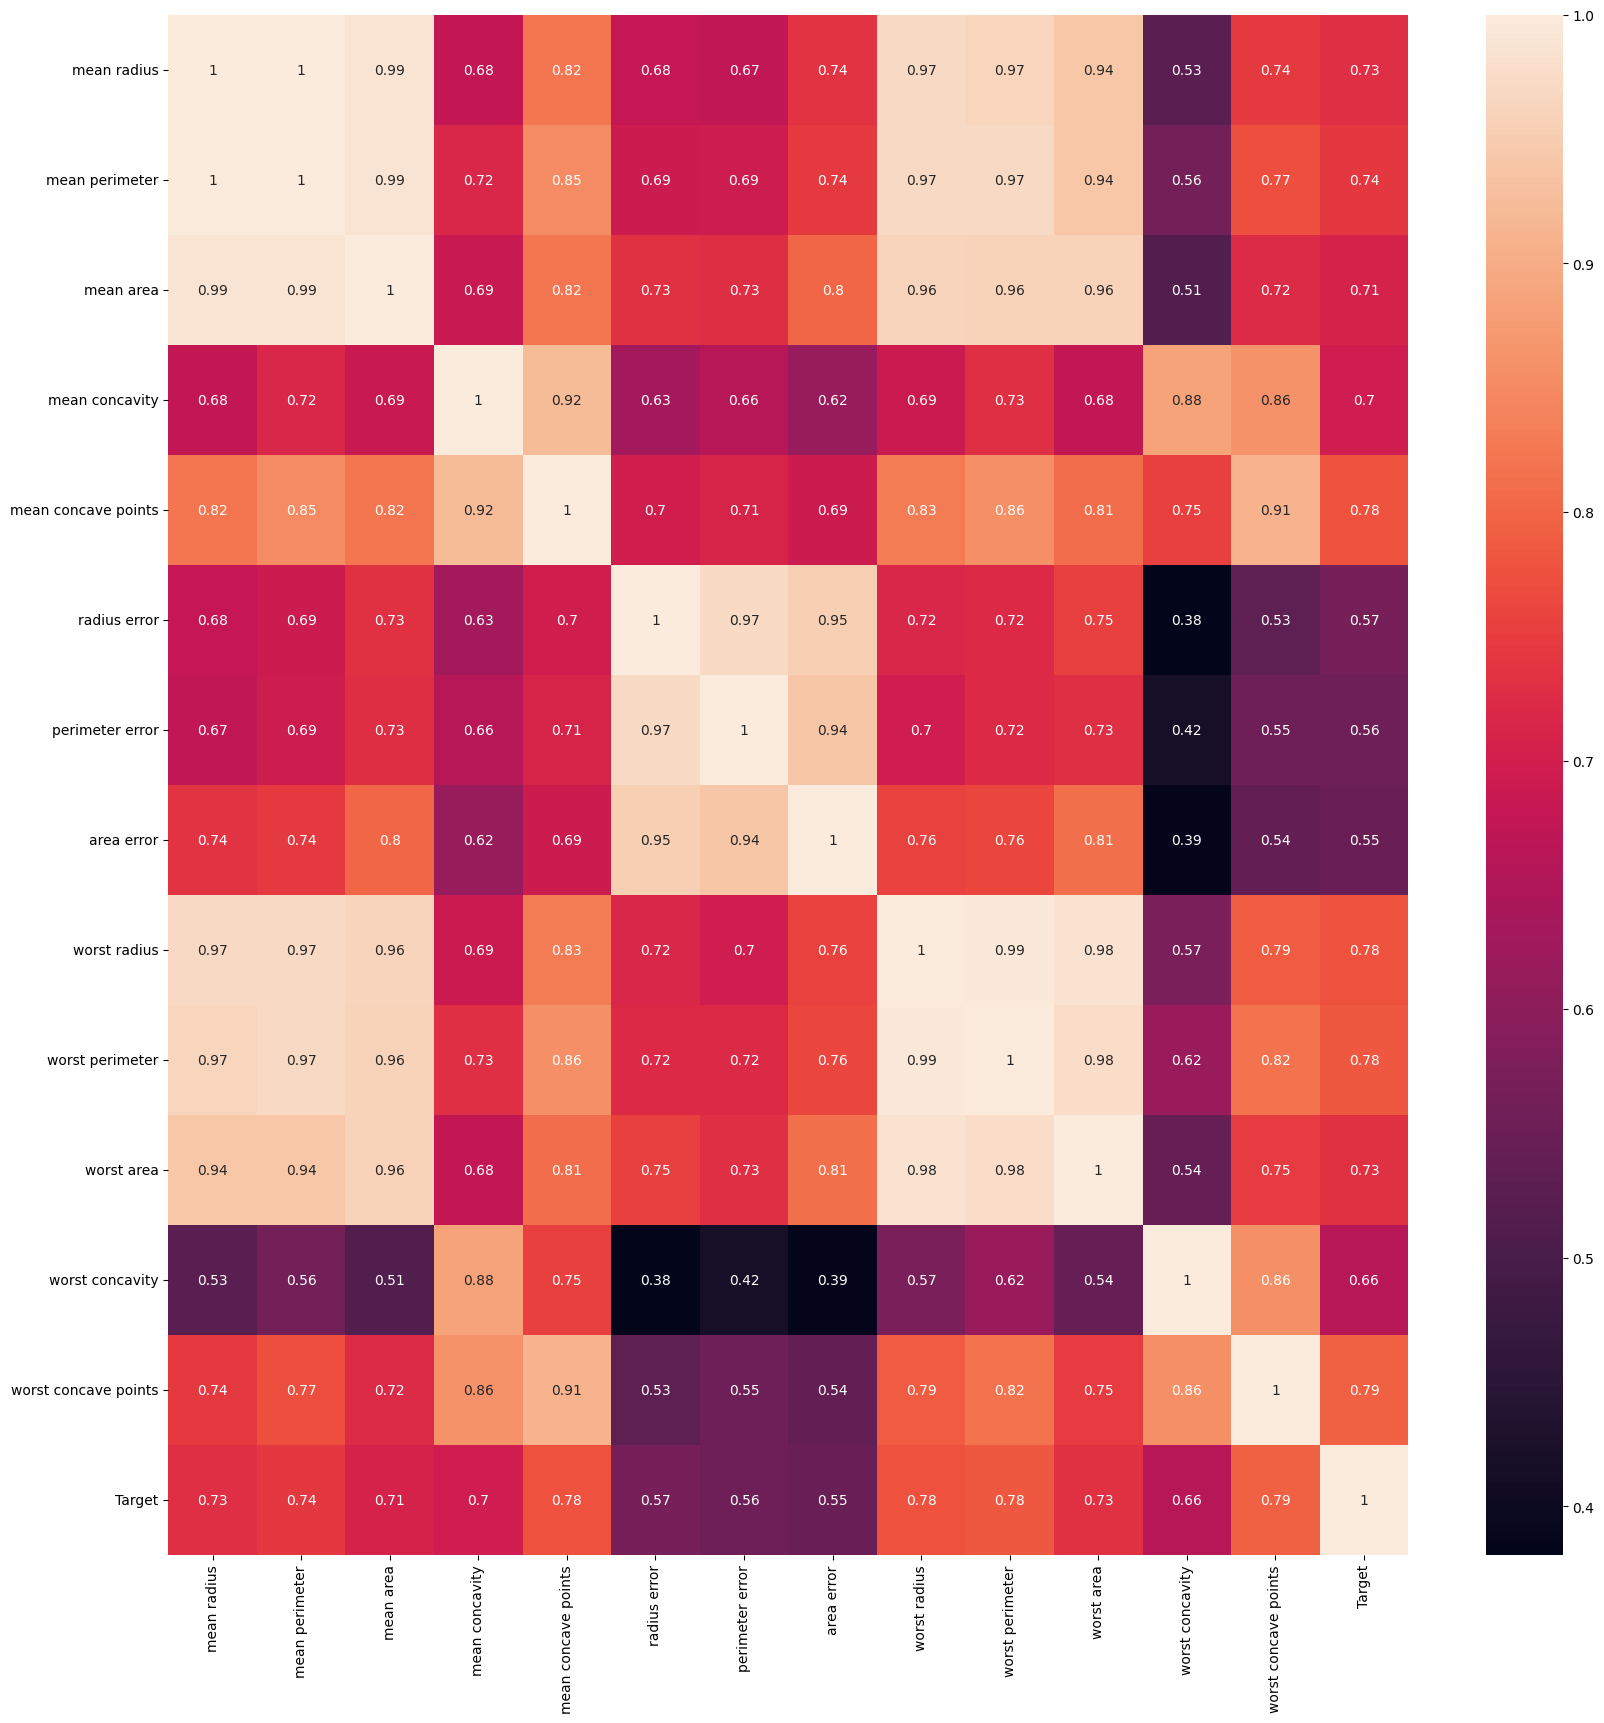

In [ ]:
copied_data = data.copy()
copied_data['Target'] = diagnosis['Target']
plt.figure(figsize=(20, 20))
sns.heatmap(copied_data.corr(), annot=True)

From the heapmap above, I can conclude that I managed to slice out all the features that are **quite correlated** with the **Target** variable and I was able also to wrap up the number of dimensions **from 30 to 13** dimensions.

## **Split Dataset**

In [ ]:
# Splitting data 
X_train, X_test, y_train, y_test = train_test_split(data, diagnosis['Target'], test_size=0.3, random_state=1)

I wanted to split up the dataset into 70% for training and 30% for testing while fixing the random state to 1

In [ ]:
X_train.head()

,mean radius,mean perimeter,mean area,mean concavity,mean concave points,radius error,perimeter error,area error,worst radius,worst perimeter,worst area,worst concavity,worst concave points
249,11.52,73.87,406.3,0.043280,0.029290,0.2562,1.686,18.62,12.65,80.88,491.8,0.180400,0.09608
58,13.05,82.61,527.2,0.000692,0.004167,0.4040,2.595,32.96,14.23,90.24,624.1,0.001845,0.01111
476,14.20,92.41,618.4,0.050630,0.030580,0.3478,2.749,31.01,16.45,112.10,828.5,0.251200,0.13390
529,12.07,77.83,445.2,0.037810,0.027980,0.2513,1.714,18.54,13.45,86.92,549.9,0.162200,0.07393
422,11.61,75.46,408.2,0.070970,0.044970,0.2456,1.667,15.89,12.64,81.93,475.7,0.230200,0.11050


In [ ]:
X_train.shape

(398, 13)

In [ ]:
y_train.head()

249    0
58     0
476    0
529    0
422    0
Name: Target, dtype: int64

In [ ]:
y_train.value_counts()

0    249
1    149
Name: Target, dtype: int64

In [ ]:
X_test.head()

,mean radius,mean perimeter,mean area,mean concavity,mean concave points,radius error,perimeter error,area error,worst radius,worst perimeter,worst area,worst concavity,worst concave points
421,14.69,98.22,656.1,0.14500,0.06300,0.5462,4.795,49.45,16.46,114.10,809.2,0.3219,0.11080
47,13.17,85.98,534.6,0.12260,0.07340,0.2871,1.897,24.25,15.67,102.80,759.4,0.5006,0.20880
292,12.95,83.14,513.7,0.06155,0.03370,0.2094,1.231,17.67,13.74,88.81,585.4,0.2241,0.10560
186,18.31,118.60,1041.0,0.08169,0.05814,0.2577,1.817,28.92,21.31,139.20,1410.0,0.3538,0.15710
414,15.13,96.71,719.5,0.04686,0.02739,0.4681,3.043,45.38,17.26,110.10,931.4,0.1547,0.06575


In [ ]:
X_test.shape

(171, 13)

In [ ]:
y_test.value_counts()

0    108
1     63
Name: Target, dtype: int64

##**Train Model and Evaluation**

###**With K-NN**

In [ ]:
class KNN:
    def __init__(self, k):
        # Initialize value of k
        self.k = k

    def fit(self, X, y):
        # Set training data and labels
        self.X_train = X
        self.y_train = y

    def euclidean_distance(self, X):
        # Compute euclidean distance between test point and training points
        distances = []
        for p in self.X_train.to_numpy():
          distance = 0
          for point in range(len(p)):
            distance += (p[point] - X[point]) ** 2
          distances.append(distance ** 0.5)
        return distances
    
    def manhattan_distance(self, X):
        # Compute manhattan distance between test point and training points
        distances = []
        for p in self.X_train.to_numpy():
          distance = 0
          for point in range(len(p)):
            distance += abs(p[point] - X[point])
          distances.append(distance)
        return distances

    def predict(self, X, Y):
        # Predict class label for each test point
        y_pred = []
        distances = []
        # Choose distance metric
        choice = int(input('Tap 1 or 2 to choose either Euclidean or Manhattan distance respectively: '))
        print('################ Prediction History ################')
        for i, x in enumerate(X.to_numpy()):
            print('*** Test #' + str(i) + ':\tFeatures =>',x, '\tLabel to predict =>', Y.to_numpy()[i])
            # Compute distances between test point and training points
            if choice == 1:
              distances = self.euclidean_distance(x)
            else:
              distances = self.manhattan_distance(x)
            # Select k-nearest neighbors
            k_neighbors = np.argsort(distances)[:self.k]
            k_labels = [self.y_train.iloc[i] for i in k_neighbors]
            print('>>> Top ' + str(self.k) + ' nearest neighbors:', k_labels)
            # Compute most common class label among k-nearest neighbors
            most_common = max(set(k_labels), key=k_labels.count)
            print('>>> The predicted class after the vote: ' + str(most_common))
            print('\n---------------------------------------------------------\n')
            # Add predicted class label to y_pred list
            y_pred.append(most_common)
        return np.array(y_pred)


In [ ]:
# Instantiate the kNN classifier with k=3
knn = KNN(k=int(input('Enter K: ')))

# Train the classifier on the training set
knn.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn.predict(X_test, y_test)

Enter K: 3
Tap 1 or 2 to choose either Euclidean or Manhattan distance respectively: 1
################ Prediction History ################
*** Test #0:	Features => [1.469e+01 9.822e+01 6.561e+02 1.450e-01 6.300e-02 5.462e-01 4.795e+00
 4.945e+01 1.646e+01 1.141e+02 8.092e+02 3.219e-01 1.108e-01] 	Label to predict => 0
>>> Top 3 nearest neighbors: [0, 1, 0]
>>> The predicted class after the vote: 0

---------------------------------------------------------

*** Test #1:	Features => [1.317e+01 8.598e+01 5.346e+02 1.226e-01 7.340e-02 2.871e-01 1.897e+00
 2.425e+01 1.567e+01 1.028e+02 7.594e+02 5.006e-01 2.088e-01] 	Label to predict => 1
>>> Top 3 nearest neighbors: [1, 1, 0]
>>> The predicted class after the vote: 1

---------------------------------------------------------

*** Test #2:	Features => [1.295e+01 8.314e+01 5.137e+02 6.155e-02 3.370e-02 2.094e-01 1.231e+00
 1.767e+01 1.374e+01 8.881e+01 5.854e+02 2.241e-01 1.056e-01] 	Label to predict => 0
>>> Top 3 nearest neighbors: [0, 0,

####**Evaluate Model**

In [ ]:
# Function to create custom confusion matrix
def custom_confusion_matrix(y_test, y_preds):
    my_palette = sns.color_palette("pastel", 4)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=True, cmap=['#E97777', '#93C6E7', '#54BAB9'])
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
    fig.canvas.draw()
    labels = list(bcwd.target_names[::-1])

    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

[[102   6]
 [  8  55]]


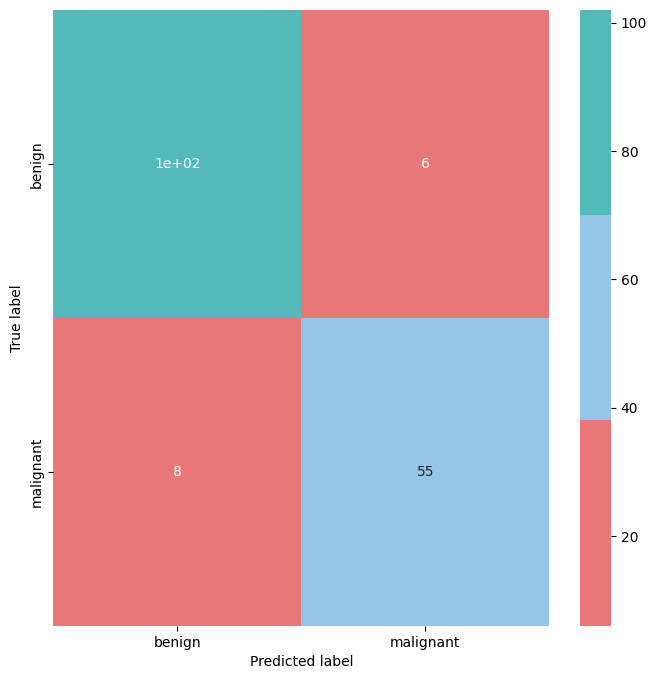

In [ ]:
# Displaying the matrix 
print(confusion_matrix(y_test, y_pred))
custom_confusion_matrix(y_test, y_pred)


This confusion matrix is for a binary classification problem related to breast cancer. The rows represent the true class of the samples, and the columns represent the predicted class of the samples.

- The top-left cell indicates the number of true negative (**TN**) samples, which means the number of correctly predicted benign tumors.
- The top-right cell indicates the number of false positive (**FP**) samples, which means the number of benign tumors that were predicted as malignant.
- The bottom-left cell indicates the number of false negative (**FN**) samples, which means the number of malignant tumors that were predicted as benign.
- The bottom-right cell indicates the number of true positive (**TP**) samples, which means the number of correctly predicted malignant tumors.


In [ ]:
# Other Metrics
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

print("The accuracy score is ", "%.2f" %accuracy)
print("The recall score is ", "%.2f" %recall)
print("The precision score is ", "%.2f" %precision)

The accuracy score is  0.92
The recall score is  0.87
The precision score is  0.90


The equation for F1 score is:

![F1 equation](https://wikimedia.org/api/rest_v1/media/math/render/svg/1bf179c30b00db201ce1895d88fe2915d58e6bfd)



In [ ]:
# Therefore, we can calculate it this way:
F1 = 2 * (precision * recall) / (precision + recall)
print("The F1 score", "%.2f" %F1)

The F1 score 0.89


In [ ]:
metrics = {
    'metrics': ['Accuracy', 'Recall', 'Precision', 'F1 Score'],
    'result': [accuracy, recall, precision, F1]
}
metrics = pd.DataFrame(metrics['result'], metrics['metrics'], )
metrics

,0
Accuracy,0.918129
Recall,0.873016
Precision,0.901639
F1 Score,0.887097


These values are performance metrics for a classification model, usually obtained by comparing the predicted values to the actual values in a test dataset.

- Accuracy: The proportion of correct predictions out of the total number of predictions. 

- Recall: The proportion of true positives (correctly predicted positives) out of all actual positives. 

- Precision: The proportion of true positives out of all predicted positives. 

- F1 Score: A weighted average of precision and recall, where 1 is the best possible score and 0 is the worst. 

###**With Neural Network**

In [ ]:
class NeuralNetwork:
  def __init__(self):
    # initialize weights and biases randomly
    self.weights = np.random.randn(13, 1)
    self.bias = np.random.randn()
    
  def weighted_sum(self, x):
    # calculate the weighted sum of inputs and weights, and add the bias
    return np.dot(x, self.weights) + self.bias
    
  def predict(self, x):
    # feedforward: calculate output from input
    return np.where(self.weighted_sum(x) > 0, 1, 0)

  def fit(self, x_train, y_train):
    # train the model by updating weights and bias
    for i in range(len(x_train)):
      print('*** Epoch #' + str(i), '\tLabel to predict =>', y_train.to_numpy()[i])
      print('\nActual Weights: {}\nActual Bias: {}'.format([x[0] for x in self.weights], self.bias))
      x = x_train.to_numpy()[i]
      print('The weighted sum: {}'.format(self.weighted_sum(x)))
      y_true = y_train.to_numpy()[i]
      y_pred = self.predict(x)
      print('\n>>> The predicted class after the {} epoch: {}'.format(i, y_pred))
      error = y_true - y_pred
      self.weights += error * x.reshape(-1, 1)
      self.bias += error
      print('\n---------------------------------------------------------\n')


In [ ]:
# create neural network object
nn = NeuralNetwork()

# fit the model with training data
nn.fit(X_train, y_train)

# make predictions on test data
y_pred = nn.predict(X_test)

*** Epoch #0 	Label to predict => 0

Actual Weights: [-0.39387287819470695, 1.0294148524660536, -2.2159573154853995, 0.6745628968577665, -0.4042936753302418, -1.2095819444744744, 0.8796840337013903, -0.21477932311169787, -0.5595446699287491, 0.6990601960296416, -0.8329952300253859, 1.4135096245746952, -0.44568543944541894]
Actual Bias: 0.28593320282238843
The weighted sum: [-1191.35377964]

>>> The predicted class after the 0 epoch: [0]

---------------------------------------------------------

*** Epoch #1 	Label to predict => 0

Actual Weights: [-0.39387287819470695, 1.0294148524660536, -2.2159573154853995, 0.6745628968577665, -0.4042936753302418, -1.2095819444744744, 0.8796840337013903, -0.21477932311169787, -0.5595446699287491, 0.6990601960296416, -0.8329952300253859, 1.4135096245746952, -0.44568543944541894]
Actual Bias: [0.2859332]
The weighted sum: [-1558.1068743]

>>> The predicted class after the 1 epoch: [0]

---------------------------------------------------------

*** Epo

####**Evaluate Model**

In [ ]:
# Function to create custom confusion matrix
def custom_confusion_matrix(y_test, y_preds):
    my_palette = sns.color_palette("pastel", 4)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=True, cmap=['#E97777', '#93C6E7', '#54BAB9'])
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
    fig.canvas.draw()
    labels = list(bcwd.target_names[::-1])

    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

[[79 29]
 [ 2 61]]


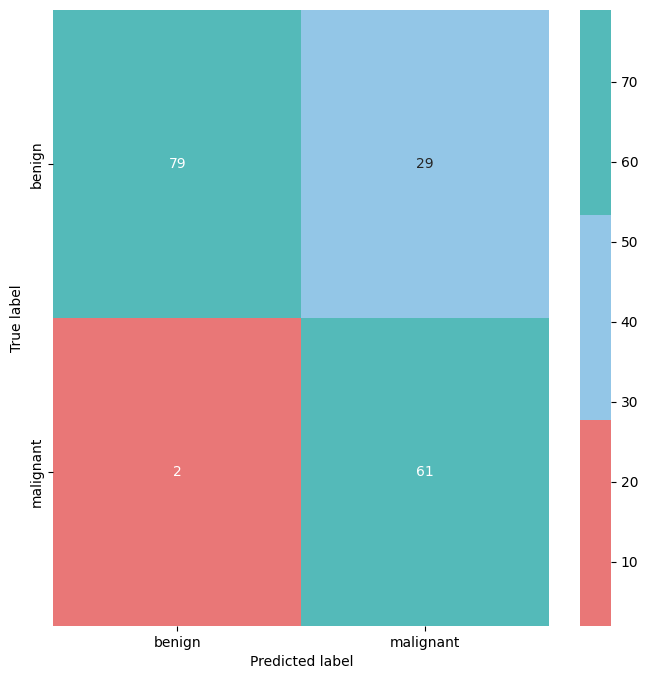

In [ ]:
# Displaying the matrix 
print(confusion_matrix(y_test, y_pred))
custom_confusion_matrix(y_test, y_pred)


This confusion matrix is for a binary classification problem related to breast cancer. The rows represent the true class of the samples, and the columns represent the predicted class of the samples.

- The top-left cell indicates the number of true negative (**TN**) samples, which means the number of correctly predicted benign tumors.
- The top-right cell indicates the number of false positive (**FP**) samples, which means the number of benign tumors that were predicted as malignant.
- The bottom-left cell indicates the number of false negative (**FN**) samples, which means the number of malignant tumors that were predicted as benign.
- The bottom-right cell indicates the number of true positive (**TP**) samples, which means the number of correctly predicted malignant tumors.


In [ ]:
# Other Metrics
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

print("The accuracy score is ", "%.2f" %accuracy)
print("The recall score is ", "%.2f" %recall)
print("The precision score is ", "%.2f" %precision)

The accuracy score is  0.82
The recall score is  0.97
The precision score is  0.68


The equation for F1 score is:

![F1 equation](https://wikimedia.org/api/rest_v1/media/math/render/svg/1bf179c30b00db201ce1895d88fe2915d58e6bfd)



In [ ]:
# Therefore, we can calculate it this way:
F1 = 2 * (precision * recall) / (precision + recall)
print("The F1 score", "%.2f" %F1)

The F1 score 0.80


In [ ]:
metrics = {
    'metrics': ['Accuracy', 'Recall', 'Precision', 'F1 Score'],
    'result': [accuracy, recall, precision, F1]
}
metrics = pd.DataFrame(metrics['result'], metrics['metrics'], )
metrics

,0
Accuracy,0.818713
Recall,0.968254
Precision,0.677778
F1 Score,0.797386


These values are performance metrics for a classification model, usually obtained by comparing the predicted values to the actual values in a test dataset.

- Accuracy: The proportion of correct predictions out of the total number of predictions. 

- Recall: The proportion of true positives (correctly predicted positives) out of all actual positives. 

- Precision: The proportion of true positives out of all predicted positives.

- F1 Score: A weighted average of precision and recall, where 1 is the best possible score and 0 is the worst. 

###**With SVM**

In [ ]:
# Train SVM model
C = 1.0  # SVM regularization parameter
svm = SVC(kernel='linear', C=C)
svm.fit(X_train, y_train)

# make predictions on test data
y_pred = svm.predict(X_test)

####**Evaluate Model**

In [ ]:
# Function to create custom confusion matrix
def custom_confusion_matrix(y_test, y_preds):
    my_palette = sns.color_palette("pastel", 4)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=True, cmap=['#E97777', '#93C6E7', '#54BAB9'])
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
    fig.canvas.draw()
    labels = list(bcwd.target_names[::-1])

    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

[[103   5]
 [  8  55]]


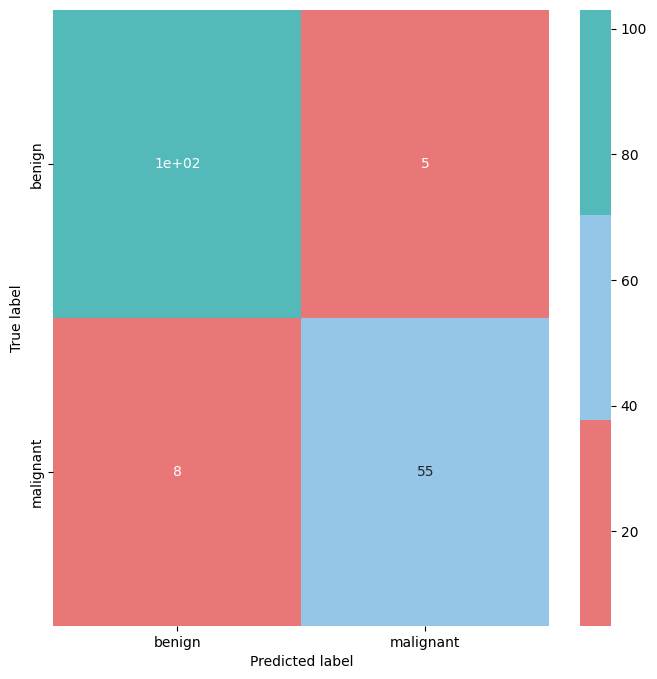

In [ ]:
# Displaying the matrix 
print(confusion_matrix(y_test, y_pred))
custom_confusion_matrix(y_test, y_pred)


This confusion matrix is for a binary classification problem related to breast cancer. The rows represent the true class of the samples, and the columns represent the predicted class of the samples.

- The top-left cell indicates the number of true negative (**TN**) samples, which means the number of correctly predicted benign tumors.
- The top-right cell indicates the number of false positive (**FP**) samples, which means the number of benign tumors that were predicted as malignant.
- The bottom-left cell indicates the number of false negative (**FN**) samples, which means the number of malignant tumors that were predicted as benign.
- The bottom-right cell indicates the number of true positive (**TP**) samples, which means the number of correctly predicted malignant tumors.


In [ ]:
# Other Metrics
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

print("The accuracy score is ", "%.2f" %accuracy)
print("The recall score is ", "%.2f" %recall)
print("The precision score is ", "%.2f" %precision)

The accuracy score is  0.92
The recall score is  0.87
The precision score is  0.92


The equation for F1 score is:

![F1 equation](https://wikimedia.org/api/rest_v1/media/math/render/svg/1bf179c30b00db201ce1895d88fe2915d58e6bfd)



In [ ]:
# Therefore, we can calculate it this way:
F1 = 2 * (precision * recall) / (precision + recall)
print("The F1 score", "%.2f" %F1)

The F1 score 0.89


In [ ]:
metrics = {
    'metrics': ['Accuracy', 'Recall', 'Precision', 'F1 Score'],
    'result': [accuracy, recall, precision, F1]
}
metrics = pd.DataFrame(metrics['result'], metrics['metrics'], )
metrics

,0
Accuracy,0.923977
Recall,0.873016
Precision,0.916667
F1 Score,0.894309


These values are performance metrics for a classification model, usually obtained by comparing the predicted values to the actual values in a test dataset.

- Accuracy: The proportion of correct predictions out of the total number of predictions. 

- Recall: The proportion of true positives (correctly predicted positives) out of all actual positives. 

- Precision: The proportion of true positives out of all predicted positives. 

- F1 Score: A weighted average of precision and recall, where 1 is the best possible score and 0 is the worst. 

###**With Random Forest**

In [ ]:
# Create a Random Forest Classifier object
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rfc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rfc.predict(X_test)

####**Evaluate Model**

In [ ]:
# Function to create custom confusion matrix
def custom_confusion_matrix(y_test, y_preds):
    my_palette = sns.color_palette("pastel", 4)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=True, cmap=['#E97777', '#93C6E7', '#54BAB9'])
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
    fig.canvas.draw()
    labels = list(bcwd.target_names[::-1])

    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

[[104   4]
 [  7  56]]


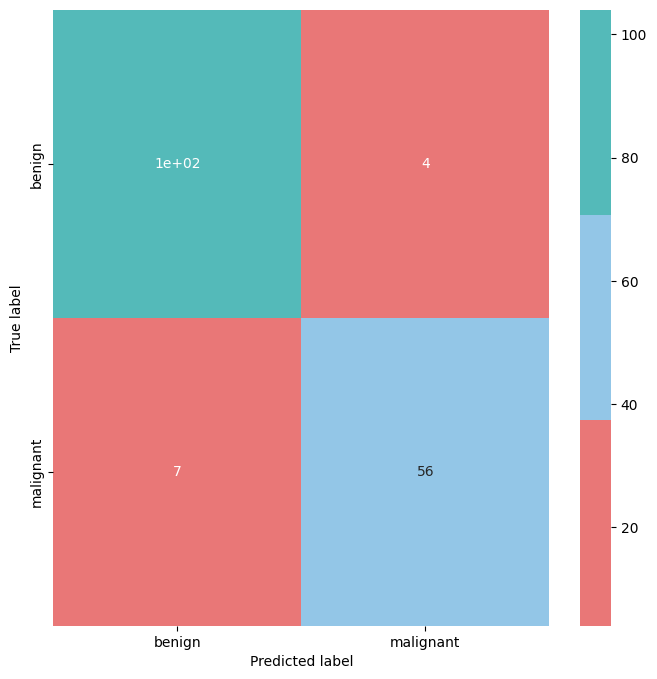

In [ ]:
# Displaying the matrix 
print(confusion_matrix(y_test, y_pred))
custom_confusion_matrix(y_test, y_pred)


This confusion matrix is for a binary classification problem related to breast cancer. The rows represent the true class of the samples, and the columns represent the predicted class of the samples.

- The top-left cell indicates the number of true negative (**TN**) samples, which means the number of correctly predicted benign tumors.
- The top-right cell indicates the number of false positive (**FP**) samples, which means the number of benign tumors that were predicted as malignant.
- The bottom-left cell indicates the number of false negative (**FN**) samples, which means the number of malignant tumors that were predicted as benign.
- The bottom-right cell indicates the number of true positive (**TP**) samples, which means the number of correctly predicted malignant tumors.


In [ ]:
# Other Metrics
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

print("The accuracy score is ", "%.2f" %accuracy)
print("The recall score is ", "%.2f" %recall)
print("The precision score is ", "%.2f" %precision)

The accuracy score is  0.94
The recall score is  0.89
The precision score is  0.93


The equation for F1 score is:

![F1 equation](https://wikimedia.org/api/rest_v1/media/math/render/svg/1bf179c30b00db201ce1895d88fe2915d58e6bfd)



In [ ]:
# Therefore, we can calculate it this way:
F1 = 2 * (precision * recall) / (precision + recall)
print("The F1 score", "%.2f" %F1)

The F1 score 0.91


In [ ]:
metrics = {
    'metrics': ['Accuracy', 'Recall', 'Precision', 'F1 Score'],
    'result': [accuracy, recall, precision, F1]
}
metrics = pd.DataFrame(metrics['result'], metrics['metrics'], )
metrics

,0
Accuracy,0.935673
Recall,0.888889
Precision,0.933333
F1 Score,0.910569


These values are performance metrics for a classification model, usually obtained by comparing the predicted values to the actual values in a test dataset.

- Accuracy: The proportion of correct predictions out of the total number of predictions. 

- Recall: The proportion of true positives (correctly predicted positives) out of all actual positives. 

- Precision: The proportion of true positives out of all predicted positives. 

- F1 Score: A weighted average of precision and recall, where 1 is the best possible score and 0 is the worst. 